In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
import pandas as pd
import pymannkendall as pmk
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [6]:
data = xr.open_dataset('chirps_21_WA_new.nc')
data

<xarray.Dataset>
Dimensions:    (time: 14975, longitude: 140, latitude: 80)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2021-12-31
  * longitude  (longitude) float32 -19.88 -19.62 -19.38 ... 14.38 14.62 14.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 19.38 19.62 19.88
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Thu Jun 09 17:26:34 2022: cdo sellonlatbox,-20,15,0,20...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [7]:
#con_v=data.precip.attrs['units']='millimeter '
#con_v

In [8]:
rr = data.precip
rr

<xarray.DataArray 'precip' (time: 14975, latitude: 80, longitude: 140)>
[167720000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2021-12-31
  * longitude  (longitude) float32 -19.88 -19.62 -19.38 ... 14.38 14.62 14.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 19.38 19.62 19.88
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/day
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [9]:
mon=rr.resample(time='1M').sum()
mon

<xarray.DataArray 'precip' (time: 492, latitude: 80, longitude: 140)>
array([[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         8.3260086e+01, 7.7137199e+01, 7.5203659e+01],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         8.2054230e+01, 7.7596848e+01, 6.9361084e+01],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         9.1125961e+01, 8.8987480e+01, 7.5438416e+01],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.4490327e+02, 1.4151752e+02, 1.3498482e+02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.4987195e+02, 1.5771428e+02, 1.6302100e+02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.3316153e+02, 1.4096770e+02, 1.4207092e+02],
...
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         2.4068556e-03, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.3944300e-03, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         3.9427225e-03, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.6231987e+02, 1.7696851e+02, 1.7768520e+02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.6614938e+02, 1.9116370e+02, 1.8460173e+02],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.5603899e+02, 1.6856345e+02, 1.7166997e+02],
        ...,
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.2091880e-03, 5.0896185e-04, 8.8894338e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         6.9030846e-04, 7.2253548e-04, 1.1458875e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
         1.2223804e-02, 1.9004086e-02, 5.3123073e-03]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2021-12-31
  * longitude  (longitude) float32 -19.88 -19.62 -19.38 ... 14.38 14.62 14.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 19.38 19.62 19.88

In [10]:
month_clim=mon.groupby('time.month').mean('time')

In [11]:
s=month_clim

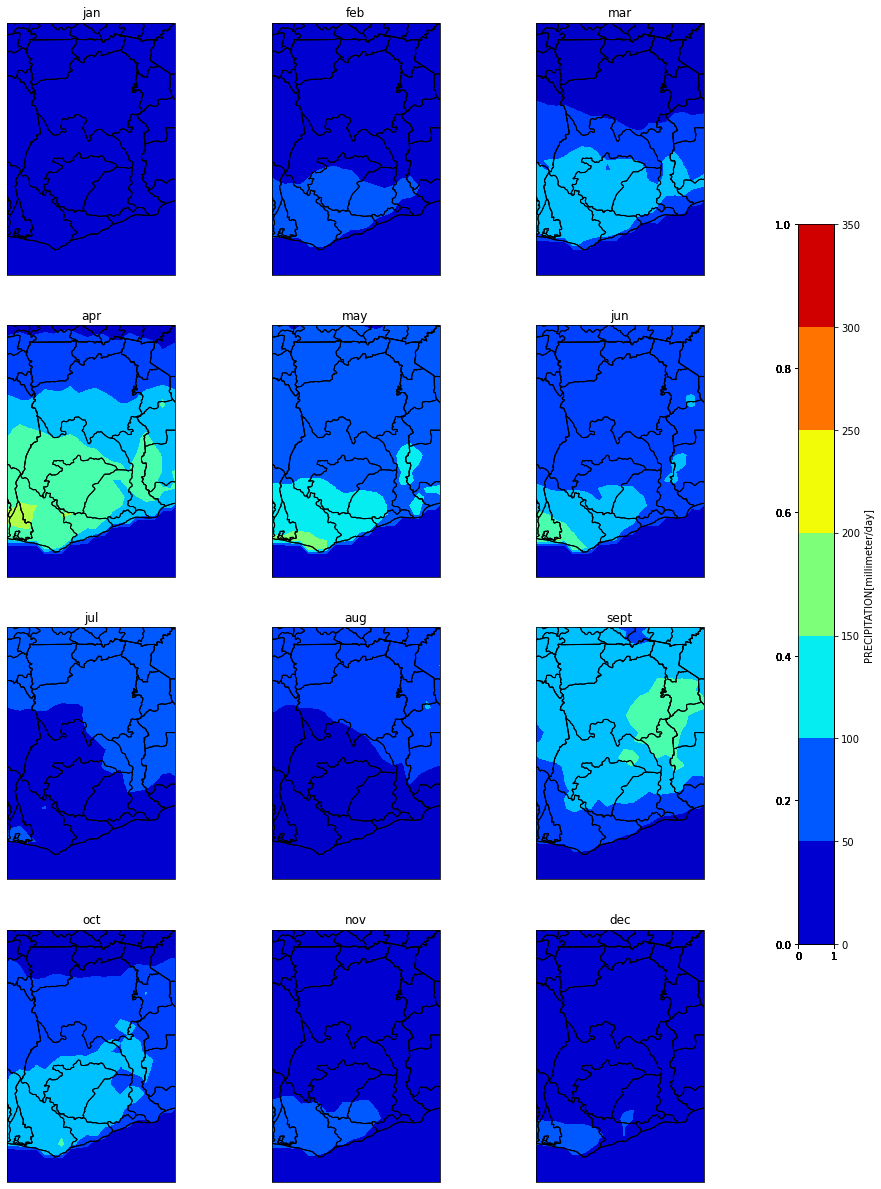

In [12]:
fig,ax=plt.subplots(4,3,figsize=(20,20),subplot_kw={'projection':ccrs.PlateCarree()})
ax = ax.flatten()
                    
month_names=['jan','feb','mar','apr','may','jun','jul','aug','sept','oct','nov','dec']
for i in range(12):
    ax[i].add_feature(cf.COASTLINE,zorder = 2)
    ax[i].add_feature(cf.BORDERS,zorder = 2)
   # ax[i].add_feature(cf.RIVERS,zorder = 2)
    ax[i].add_feature(cf.STATES,zorder = 2)
    #ax[i].add_feature(cf.LAKES,zorder = 4)
   # ax[i].add_feature(cf.OCEAN,zorder = 2,color='blue')
    ax[i].set_extent([-3.5,1.5,4,11.5])
    ax[i].set_title(month_names[i])
    #ax.set_title('MONTHLY DISTRIBUTION OF RAINFALL')
    cb=ax[i].contourf(s.longitude,s.latitude,s[i],transform=ccrs.PlateCarree(),cmap='jet')              
    color_bar = fig.add_axes([0.82,0.29,0.025,0.5])
                    
fig.colorbar(cb,cax=color_bar,label='PRECIPITATION[millimeter/day]')
plt.subplots_adjust(wspace=-0.55,top=0.93)    
#plt.savefig('precip.jpeg')

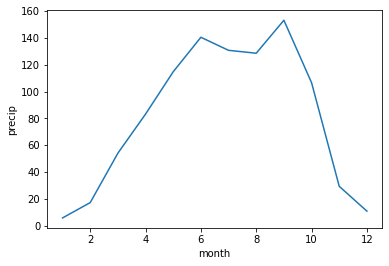

In [13]:

time_s=s.sel(longitude=slice(-3.5,1.5),latitude=slice(4,11.5))
time_s = time_s.mean(dim=('longitude','latitude'))
time_s.plot()
#plt.savefig('timeseries.jpeg')

In [14]:
#ann_av=s.groupby('time.year').mean('time')

#ann_av

ann_av=rr.groupby('time.year').mean('time')
yrs=ann_av

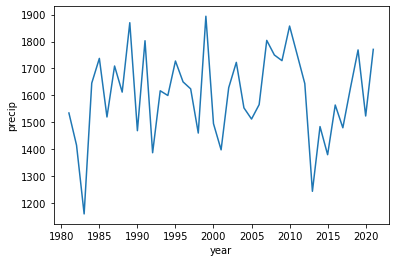

In [15]:
tim_s2=yrs.sel(longitude=slice(-3.5,1.5),latitude=slice(4,11.5))
tim_s2=tim_s2.sum(dim=('longitude','latitude'))
tim_s2.plot()

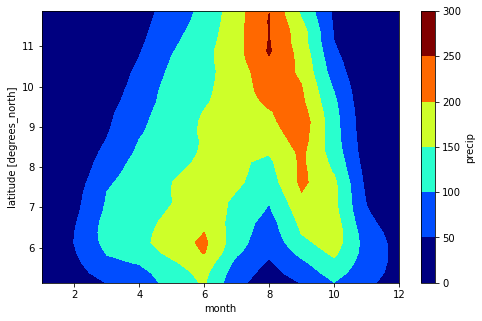

In [19]:

ARS=mon.sel(longitude=slice(-3.5,1.5),latitude=slice(4.9,12))
ARS.groupby('time.month').mean(dim=('time','longitude')).T.plot.contourf(cmap="jet")
#plt.savefig('HOVMOLLER.jpeg')

In [17]:
#stat_result=pmk.original_test(ann_av)
#print(stat_result)

In [18]:
#print(stat_result.slope)
